In [4]:
import pandas as pd
import numpy as np
import joblib

# 데스크탑
df = pd.read_csv("C:\\Users\\Hong_PC\\Desktop\\기상청 날씨 빅데이터 공모전\\과제2\\fog_train.csv")

# 노트북


In [5]:
# 1열 제거
df = df.drop(columns=[df.columns[0]])
# 열 이름의 . 앞에 단어 제거
df.columns = [col.split('.')[-1] if '.' in col else col for col in df.columns]

In [6]:
df.head

<bound method NDFrame.head of         year  month  day  time  minute stn_id  ws10_deg  ws10_ms   ta   re  \
0          I      1    1     0      10     AA       0.0      0.0 -6.4  0.0   
1          I      1    1     0      20     AA       0.0      0.0 -6.3  0.0   
2          I      1    1     0      30     AA       0.0      0.0 -6.3  0.0   
3          I      1    1     0      40     AA      27.8      0.4 -6.2  0.0   
4          I      1    1     0      50     AA      59.7      0.5 -6.1  0.0   
...      ...    ...  ...   ...     ...    ...       ...      ...  ...  ...   
3156454    K     12   31    23      10     EC     305.3      7.7  2.5  0.0   
3156455    K     12   31    23      20     EC     293.8      5.7  2.3  0.0   
3156456    K     12   31    23      30     EC     274.2      4.9  2.2  0.0   
3156457    K     12   31    23      40     EC     270.3      4.6  2.1  0.0   
3156458    K     12   31    23      50     EC     254.8      4.1  2.1  0.0   

           hm  sun10   ts   vis1 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156459 entries, 0 to 3156458
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      object 
 1   month     int64  
 2   day       int64  
 3   time      int64  
 4   minute    int64  
 5   stn_id    object 
 6   ws10_deg  float64
 7   ws10_ms   float64
 8   ta        float64
 9   re        float64
 10  hm        float64
 11  sun10     float64
 12  ts        float64
 13  vis1      int64  
 14  class     int64  
dtypes: float64(7), int64(6), object(2)
memory usage: 361.2+ MB


In [16]:
df.describe()

,month,day,time,minute,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
count,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06
mean,6.521931e+00,1.573276e+01,1.150007e+01,2.500016e+01,1.852152e+02,1.999417e+00,1.328812e+01,-4.298995e-01,6.667729e+01,-1.288869e+00,1.282955e+01,1.963548e+04,3.246275e+00
std,3.448969e+00,8.801320e+00,6.922149e+00,1.707819e+01,1.072184e+02,4.721616e+00,1.100537e+01,6.929268e+00,2.173623e+01,1.171355e+01,2.257327e+01,1.206407e+04,8.668957e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.900000e+01,-9.900000e+01
25%,4.000000e+00,8.000000e+00,6.000000e+00,1.000000e+01,8.470000e+01,9.000000e-01,5.500000e+00,0.000000e+00,5.130000e+01,0.000000e+00,5.100000e+00,1.229700e+04,4.000000e+00
50%,7.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,2.094000e+02,1.800000e+00,1.430000e+01,0.000000e+00,6.870000e+01,0.000000e+00,1.570000e+01,2.000000e+04,4.000000e+00
75%,1.000000e+01,2.300000e+01,1.800000e+01,4.000000e+01,2.769000e+02,3.000000e+00,2.200000e+01,0.000000e+00,8.470000e+01,1.600000e-01,2.430000e+01,2.000000e+04,4.000000e+00
max,1.200000e+01,3.100000e+01,2.300000e+01,5.000000e+01,3.600000e+02,2.250000e+01,3.780000e+01,1.000000e+00,1.000000e+02,2.687000e+01,7.010000e+01,6.052500e+04,4.000000e+00


In [9]:
df.columns

Index(['year', 'month', 'day', 'time', 'minute', 'stn_id', 'ws10_deg',
       'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts', 'vis1', 'class'],
      dtype='object')

In [15]:
# # 시간
# df['year'].value_counts()
# df['month'].value_counts()
# df['day'].value_counts()
# df['time'].value_counts()
# df['stn_id'].value_counts() # 지역

# -99 있음
# df['ws10_deg'].value_counts() # -99 있음
# df['ws10_ms'].value_counts() # -99 있음
# df['ta'].value_counts() # -99 있음
# df['re'].value_counts() # -99.9 있음
# df['hm'].value_counts() # -99 있음
# df['sun10'].value_counts() # -99 있음
# df['ts'].value_counts() # -99 있음
# df['vis1'].value_counts() # -99 있음
# df['class'].value_counts() # -99 있음

 20000    1107835
 50000     201606
-99         22516
 18750      11609
 17647      10327
           ...   
 46967          1
 53604          1
 52785          1
 52989          1
 32370          1
Name: vis1, Length: 51037, dtype: int64

In [20]:
# 'fog_train.vis1'이나 'fog_train.class' 열의 값이 -99.9인 행을 제거합니다.
# df1은 
df1 = df[(df['vis1'] != -99) & (df['class'] != -99)]

In [21]:
df1
df1['class'].value_counts()

4    3101809
3      12180
2      12088
1       7866
Name: class, dtype: int64

In [22]:
# df1에서 변수들 -99 NA처리
# 변환할 열 리스트
cols_to_convert = ['ws10_deg', 'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts']

# -99.9 값을 NaN으로 변환
df1[cols_to_convert] = df1[cols_to_convert].replace(-99.9, np.nan)

# 변경된 데이터프레임을 출력하여 확인합니다.
print(df1.head())

C:\Users\Hong_PC\AppData\Local\Temp\ipykernel_9732\1510763981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols_to_convert] = df1[cols_to_convert].replace(-99.9, np.nan)


  year  month  day  time  minute stn_id  ws10_deg  ws10_ms   ta   re    hm  \
0    I      1    1     0      10     AA       0.0      0.0 -6.4  0.0  38.9   
1    I      1    1     0      20     AA       0.0      0.0 -6.3  0.0  37.9   
2    I      1    1     0      30     AA       0.0      0.0 -6.3  0.0  40.0   
3    I      1    1     0      40     AA      27.8      0.4 -6.2  0.0  39.5   
4    I      1    1     0      50     AA      59.7      0.5 -6.1  0.0  39.8   

   sun10   ts   vis1  class  
0    0.0 -2.8  20000      4  
1    0.0 -2.7  20000      4  
2    0.0 -2.6  20000      4  
3    0.0 -2.6  20000      4  
4    0.0 -2.5  20000      4  


In [28]:
# 선형보간법을 이용하여 NA값 처리
df1[cols_to_convert] = df1[cols_to_convert].interpolate(method='linear')
print(df1.isnull().sum())
print("Total missing values: ", df1.isnull().sum().sum())

C:\Users\Hong_PC\AppData\Local\Temp\ipykernel_9732\2727338472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols_to_convert] = df1[cols_to_convert].interpolate(method='linear')


year        0
month       0
day         0
time        0
minute      0
stn_id      0
ws10_deg    0
ws10_ms     0
ta          0
re          0
hm          0
sun10       0
ts          0
vis1        0
class       0
dtype: int64
Total missing values:  0


In [42]:
# 클러스터 적용(n=3)
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df2 = df1.copy()

# 'stn_id' 열을 숫자로 변환
label_encoder = LabelEncoder()
df2['stn_id'] = label_encoder.fit_transform(df2['stn_id'])

# 데이터 정규화
numeric_cols = ['month', 'ws10_deg', 'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts','vis1']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df2[ numeric_cols])

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=1)
df2['cluster'] = kmeans.fit_predict(df_scaled)

# 클러스터링 결과를 출력합니다.
print(df2['cluster'].value_counts())

c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    1786744
1    1183971
2     163228
Name: cluster, dtype: int64


month          1         2         3         4         5         6         7   \
cluster                                                                         
0             0.0       0.0       0.0     208.0   65877.0  236688.0  240599.0   
1        255579.0  235742.0  252424.0  248621.0  188073.0    3532.0       0.0   
2         11408.0    8459.0   14423.0    9742.0   12998.0   17170.0   23578.0   

month          8         9         10        11        12  
cluster                                                    
0        237326.0  240247.0  254999.0  248981.0  261819.0  
1             0.0       0.0       0.0       0.0       0.0  
2         26058.0   17982.0    8584.0    7908.0    4918.0  


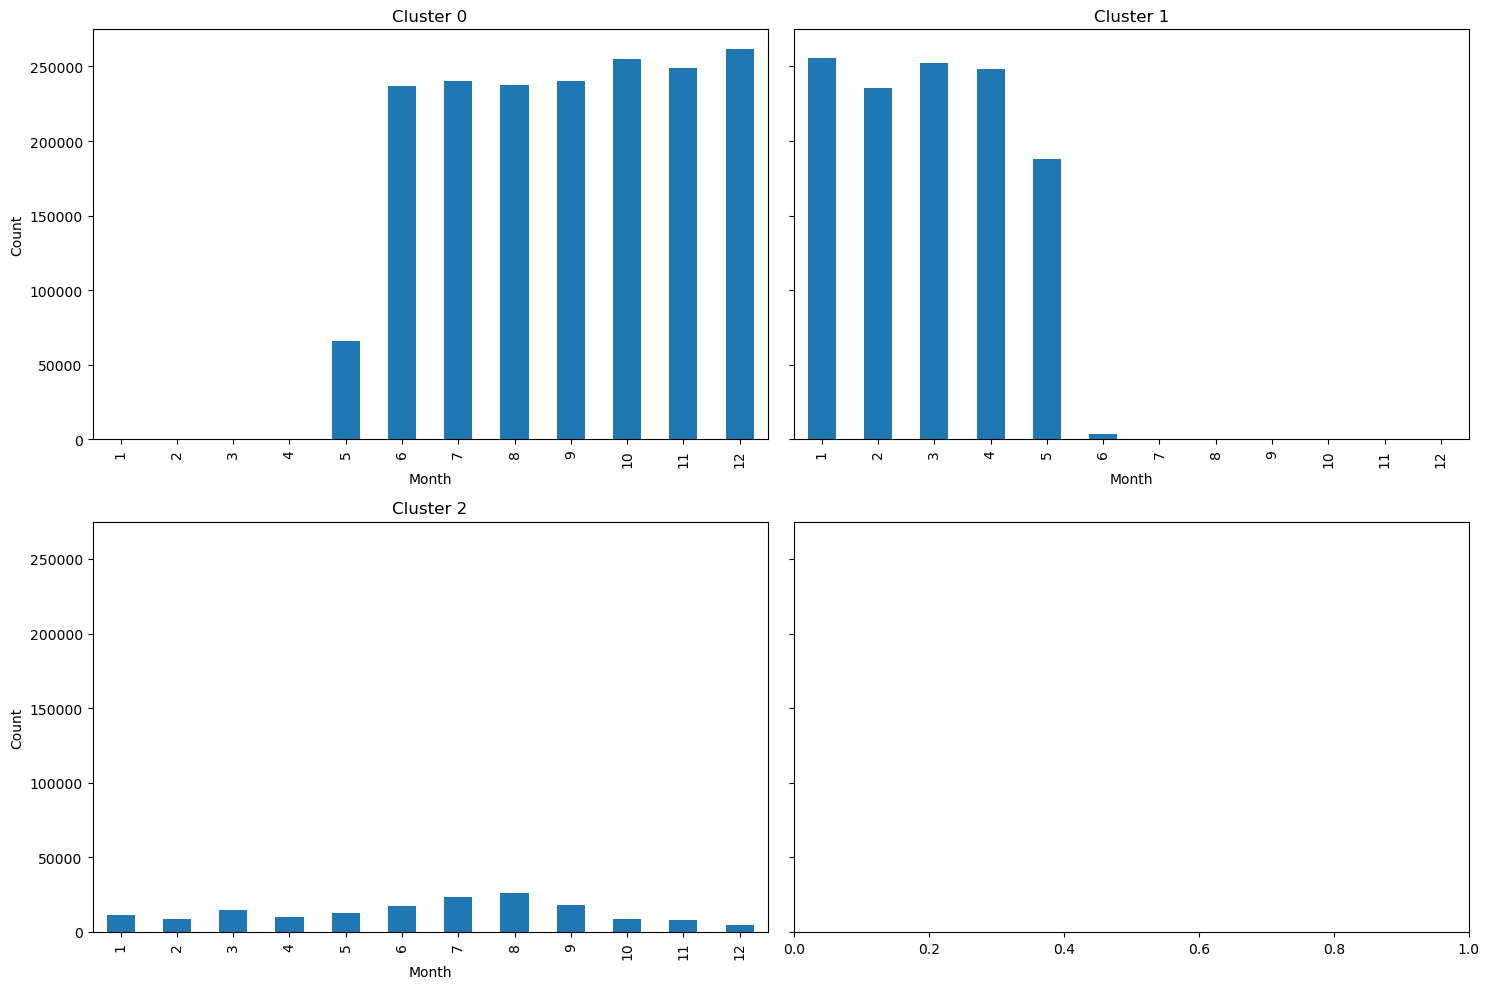

In [43]:
import matplotlib.pyplot as plt
# 각 클러스터별로 월별 데이터 개수를 계산합니다.
cluster_month_counts = df2.groupby('cluster')['month'].value_counts().unstack().fillna(0)

# 클러스터별 월별 데이터 개수 출력
print(cluster_month_counts)

# 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i in cluster_month_counts.index:
        cluster_month_counts.loc[i].plot(kind='bar', ax=ax)
        ax.set_title(f'Cluster {i}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# 클러스터 적용(n=3)
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df2 = df1.copy()

# 'stn_id' 열을 숫자로 변환
label_encoder = LabelEncoder()
df2['stn_id'] = label_encoder.fit_transform(df2['stn_id'])

# 데이터 정규화
numeric_cols = ['month', 'ws10_deg', 'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts','vis1']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df2[ numeric_cols])

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=4, random_state=1)
df2['cluster'] = kmeans.fit_predict(df_scaled)

# 클러스터링 결과를 출력합니다.
print(df2['cluster'].value_counts())

In [ ]:
import matplotlib.pyplot as plt
# 각 클러스터별로 월별 데이터 개수를 계산합니다.
cluster_month_counts = df2.groupby('cluster')['month'].value_counts().unstack().fillna(0)

# 클러스터별 월별 데이터 개수 출력
print(cluster_month_counts)

# 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i in cluster_month_counts.index:
        cluster_month_counts.loc[i].plot(kind='bar', ax=ax)
        ax.set_title(f'Cluster {i}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# 스케일 적용
# 기단별로 묶기 